In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../data/processed/spotify_total.csv', index_col='track_id')
df.head()

,track_name,artist_name,track_popularity,explicit,artist_popularity,artist_followers,album_total_tracks,track_duration_min
track_id,,,,,,,,
3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),Diplo,0,1,77.0,2812821.0,9,1.55
1oQW6G2ZiwMuHqlPpP27DB,OMG!,Yelawolf,0,1,64.0,2363438.0,1,3.07
7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,Riff Raff,4,1,48.0,193302.0,1,2.55
67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),Diplo,30,1,77.0,2813710.0,9,1.69
15xptTfRBrjsppW0INUZjf,ride me like a harley,Rumelis,0,1,48.0,8682.0,2,2.39


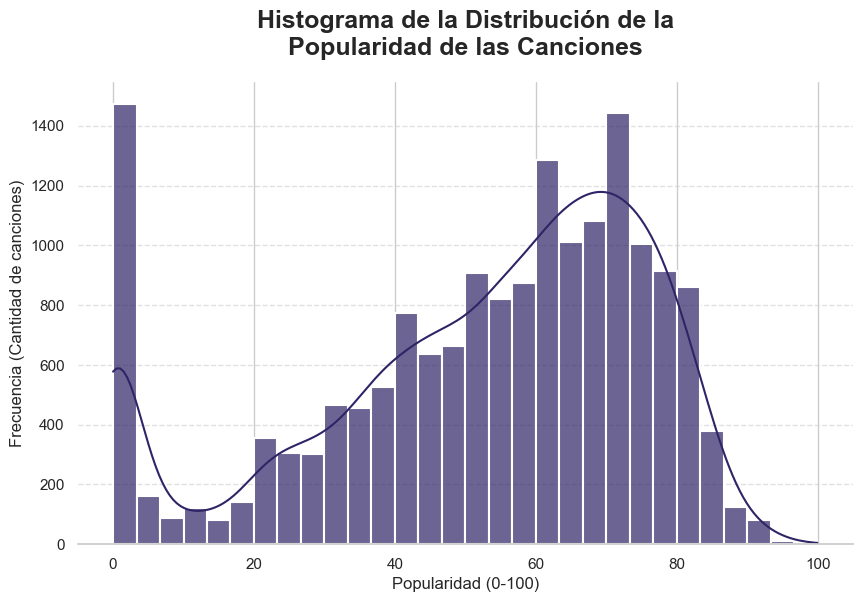

In [15]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=30, kde=True, color='#2e2466', edgecolor='#FFFFFF', linewidth=1.5, alpha=0.7)
plt.title('Histograma de la Distribución de la\nPopularidad de las Canciones', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Popularidad (0-100)', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de canciones)', fontsize=12)
sns.despine(left=True, bottom=False)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [17]:
df_filtered = df[df['track_popularity'] > 0]

print("Correlación con 0s:", df['artist_popularity'].corr(df['track_popularity']))
print("Correlación sin 0s:", df_filtered['artist_popularity'].corr(df_filtered['track_popularity']))

Correlación con 0s: 0.4613528044872387
Correlación sin 0s: 0.45314442301826224


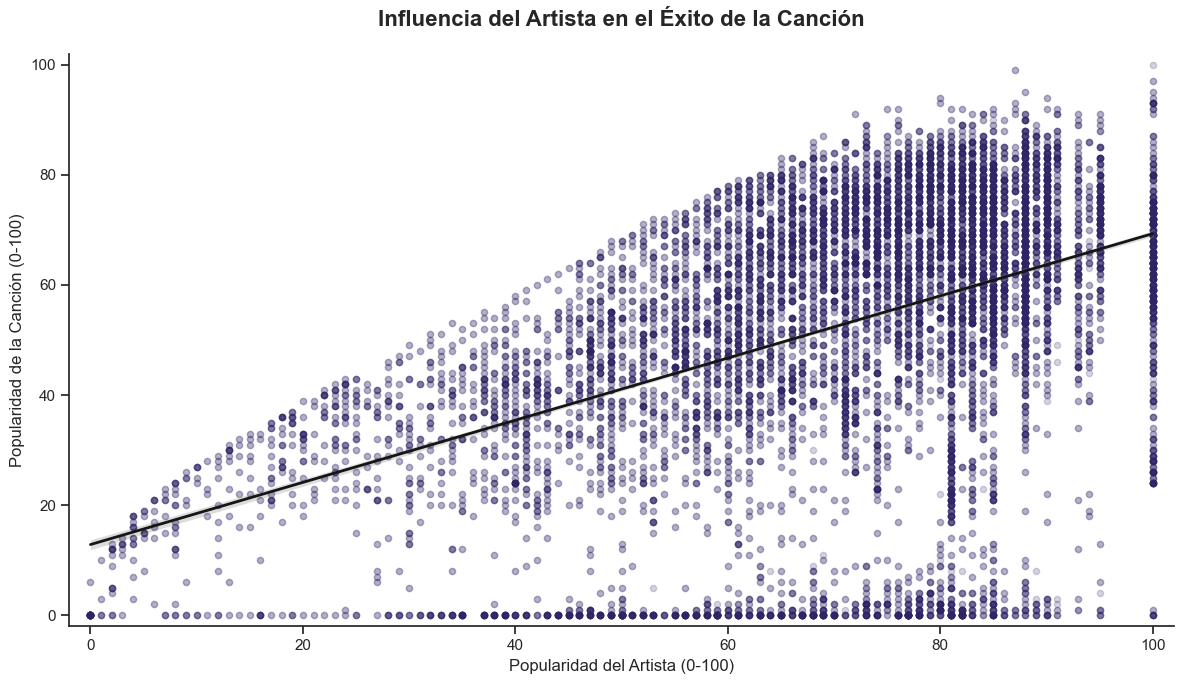

In [ ]:
sns.set_theme(style="ticks")
plt.figure(figsize=(12, 7))
sns.regplot(data=df, x='artist_popularity', y='track_popularity', 
            scatter_kws={'alpha':0.2, 's':20, 'color': '#2e2466'}, 
            line_kws={'color': "#000000", 'linewidth': 2})

plt.title('Influencia del Artista en el Éxito de la Canción', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Popularidad del Artista (0-100)', fontsize=12)
plt.ylabel('Popularidad de la Canción (0-100)', fontsize=12)
plt.xlim(-2, 102)
plt.ylim(-2, 102)

sns.despine()
plt.tight_layout()

plt.show()

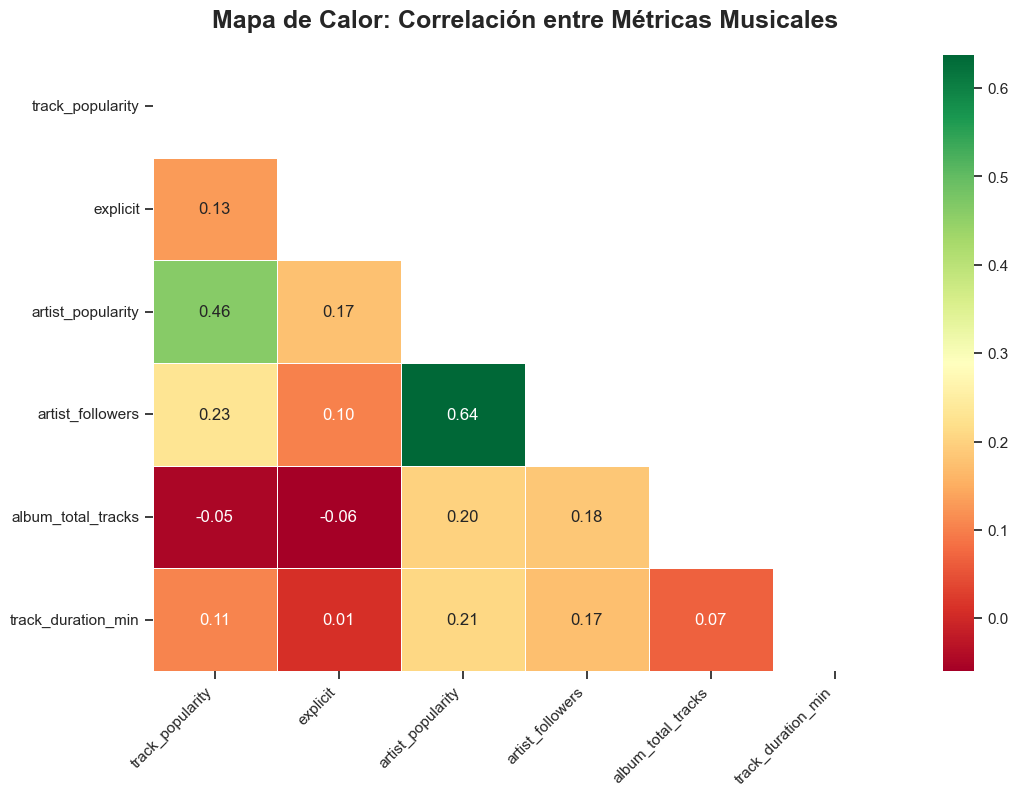

In [14]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))

sns.heatmap(numeric_df.corr(), 
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap='RdYlGn',
            linewidths=0.5)

plt.title('Mapa de Calor: Correlación entre Métricas Musicales', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)

plt.show()